In [30]:
import numpy as np
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
from scipy.spatial import Delaunay
tri = Delaunay(points)



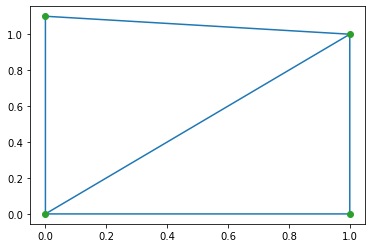

In [31]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()





In [32]:
tri.simplices

array([[2, 3, 0],
       [3, 1, 0]], dtype=int32)

In [33]:
points[tri.simplices]

array([[[1. , 0. ],
        [1. , 1. ],
        [0. , 0. ]],

       [[1. , 1. ],
        [0. , 1.1],
        [0. , 0. ]]])

In [34]:
tri.neighbors[1]

array([-1,  0, -1], dtype=int32)

In [35]:
points[tri.simplices[1,1]]

array([0. , 1.1])

In [36]:
p = np.array([(0.1, 0.2), (1.5, 0.5), (0.5, 1.05)])

In [37]:
tri.find_simplex(p)

array([ 1, -1,  1], dtype=int32)

In [38]:
p_valids = np.array([(0.1, 0.2), (0.5, 1.05)])

In [39]:
tri.simplices[tri.find_simplex(p_valids)]

array([[3, 1, 0],
       [3, 1, 0]], dtype=int32)

In [40]:
b = tri.transform[1,:2].dot(np.transpose(p - tri.transform[1,2]))

In [41]:
np.c_[np.transpose(b), 1 - b.sum(axis=0)]

array([[ 0.1       ,  0.09090909,  0.80909091],
       [ 1.5       , -0.90909091,  0.40909091],
       [ 0.5       ,  0.5       ,  0.        ]])

The above is directly from documentation for scipy
## below is my testing

Generate random points in 3D space

In [42]:
np.random.seed(0)
points = np.random.rand(10, 3)

Plot the points before Delaunay triangulation

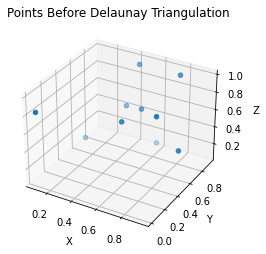

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Points Before Delaunay Triangulation')
plt.show()


Create Delaunay triangulation

In [44]:
tri = Delaunay(points)

Plot the triangulation after Delaunay triangulation

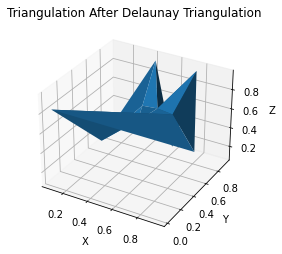

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles=tri.simplices)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Triangulation After Delaunay Triangulation')
plt.show()

Another example of basically the same thing but shorter

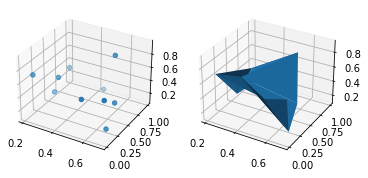

In [46]:

# generate random points in 3D space
points = np.random.rand(10, 3)

# create a triangulation object
tri = Delaunay(points)

# plot points
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# plot Delaunay triangulation
ax = fig.add_subplot(122, projection='3d')
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles=tri.simplices)
plt.show()
